# Zillow Price (Zestimate)

Project Link: https://www.kaggle.com/competitions/zillow-prize-1

In this million-dollar competition, participants will develop an algorithm that makes predictions about the future sale prices of homes. The contest is structured into two rounds, the qualifying round which opens May 24, 2017 and the private round for the 100 top qualifying teams that opens on Feb 1st, 2018. In the qualifying round, you’ll be building a model to improve the Zestimate residual error. In the final round, you’ll build a home valuation algorithm from the ground up, using external data sources to help engineer new features that give your model an edge over the competition.

This challenge aims to predict the sales prices of houses and improve upon the log error between the actual home sales and predicted home sales prices.

Four datasets exist (two of them being training sets based on 2016 and 2017 house prices and two of them being actual property prices in 2016 and 2017). Datasets were merged based on 2016 and 2017, and then combined into a final 'full_df' dataset that can be compared overall.

# Import Statements

In [1]:
import numpy as np
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import missingno as ms

%matplotlib inline

# Data Loading and Initial Look

In [2]:
train = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/train_2016_v2.csv', )
props = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/property_2016.csv')

In [3]:
print('Shape of Training Set (2016): ',train.shape)
print('Shape of Properties (2016): ',props.shape)

Shape of Training Set (2016):  (90275, 3)
Shape of Properties (2016):  (90274, 58)


In [4]:
props.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015,239695.0,5725.17,NaN,NaN,NaN


In [5]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [6]:
# Check data types
data_types = props.dtypes

# Print data types along with additional information
print("Data Types and Additional Information:")
for column in props.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {props[column].nunique()}")
    print(f" - Sample Values: {props[column].dropna().unique()[:5]}")  # Display first 5 unique non-null values
    print()

Data Types and Additional Information:
Column: parcelid
 - Data Type: int64
 - Number of Unique Values: 90274
 - Sample Values: [10754147 10759547 10843547 10859147 10879947]

Column: airconditioningtypeid
 - Data Type: float64
 - Number of Unique Values: 6
 - Sample Values: [ 1. 13.  5. 11.  9.]

Column: architecturalstyletypeid
 - Data Type: float64
 - Number of Unique Values: 5
 - Sample Values: [ 7. 21.  8.  2.  3.]

Column: basementsqft
 - Data Type: float64
 - Number of Unique Values: 50
 - Sample Values: [216. 555. 224. 782. 651.]

Column: bathroomcnt
 - Data Type: float64
 - Number of Unique Values: 27
 - Sample Values: [0. 2. 4. 3. 1.]

Column: bedroomcnt
 - Data Type: float64
 - Number of Unique Values: 16
 - Sample Values: [0. 4. 5. 2. 3.]

Column: buildingclasstypeid
 - Data Type: float64
 - Number of Unique Values: 4
 - Sample Values: [3. 4. 5. 2.]

Column: buildingqualitytypeid
 - Data Type: float64
 - Number of Unique Values: 9
 - Sample Values: [ 7.  4. 10.  1. 12.]

Co

In [7]:
zillow=train.merge(props,how='left',on='parcelid')
zillow.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12643413,0.0218,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Separating Datetime variables
zillow['transactiondate']=pd.to_datetime(zillow['transactiondate'])
zillow['month'] = zillow['transactiondate'].dt.month
zillow['year'] = zillow['transactiondate'].dt.year
zillow['month_abbr'] = zillow['month'].apply(lambda x: calendar.month_abbr[x])
zillow.drop('transactiondate', axis=1, inplace=True)

#Finding average monthly error
monthly_error = zillow.groupby(zillow['month'])['logerror'].mean().reset_index()

# Data Visualization

/tmp/ipykernel_305/656944142.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zillow['logerror'],kde=False,bins=50,ax=ax1)


<AxesSubplot:xlabel='month', ylabel='logerror'>

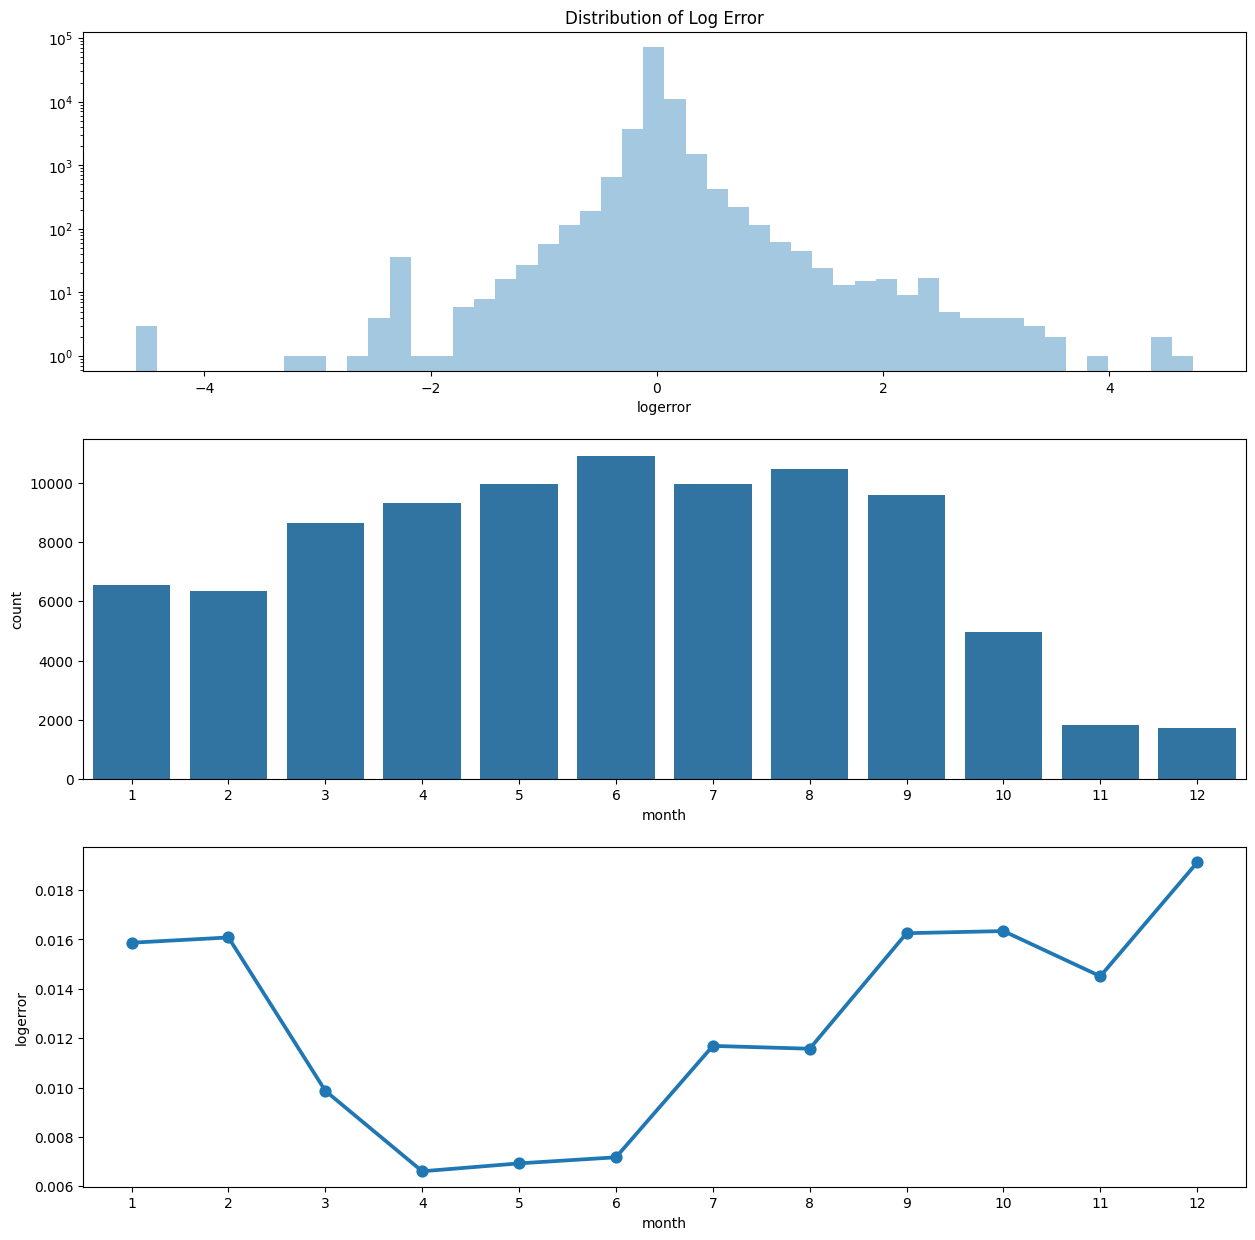

In [14]:
# Exploring Target Variable (logerror)
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,15),nrows=3)

# Checking Distribution
sns.distplot(zillow['logerror'],kde=False,bins=50,ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Distribution of Log Error')

# Checking monthly sales
sns.countplot(x='month',data=zillow,ax=ax2)
sns.pointplot(x='month',y='logerror',data=monthly_error)


# Data Cleaning

In [15]:
missing = zillow.isnull().mean().sort_values(ascending=False).reset_index()
missing.columns=['variable','percentage']
missing.head()

,variable,percentage
0,buildingclasstypeid,1.000000
1,finishedsquarefeet13,0.999989
2,basementsqft,0.999989
3,storytypeid,0.999989
4,fireplaceflag,0.999978


<AxesSubplot:xlabel='percentage', ylabel='variable'>

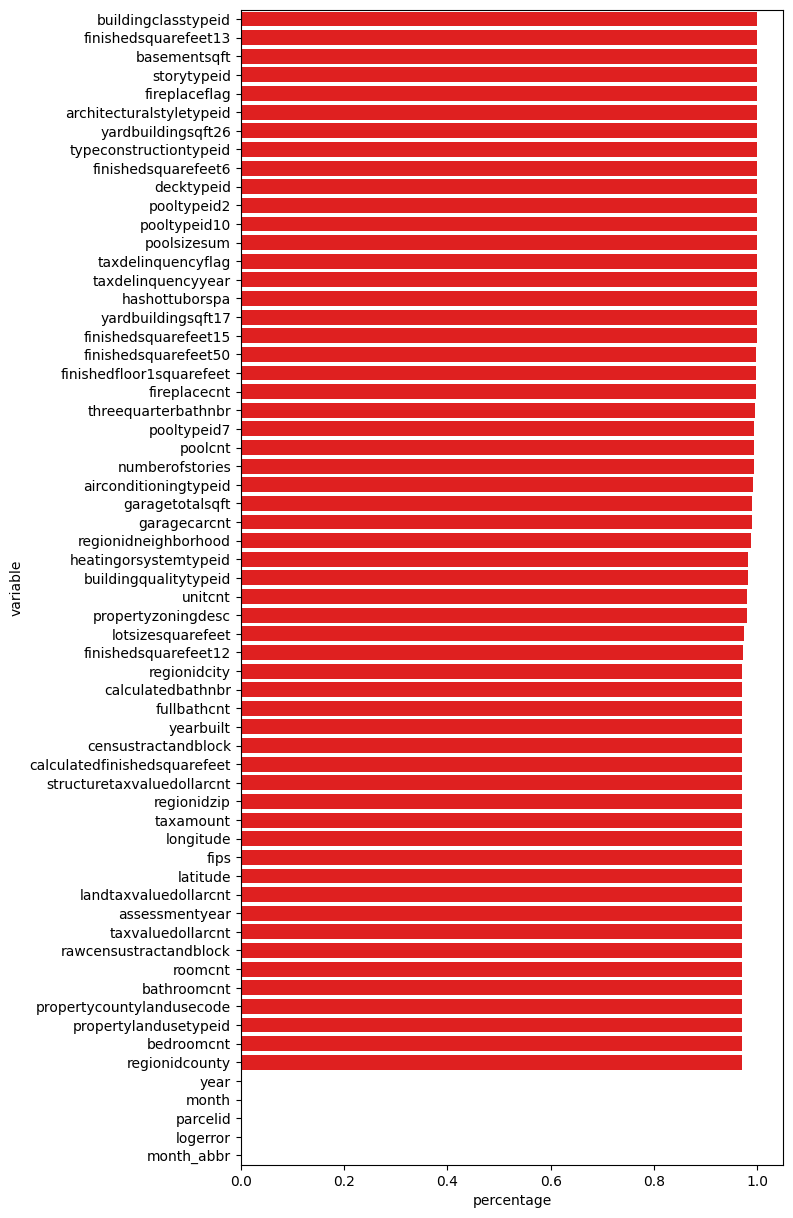

In [17]:
# Let's plot the missing variables
fix,ax = plt.subplots(figsize=(7,15))
sns.barplot(x='percentage',y='variable',data=missing,color='r')

In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

zillow['propertycountylandusecode'] = label.fit_transform(zillow['propertycountylandusecode'])
zillow['propertyzoningdesc'] = label.fit_transform(zillow['propertyzoningdesc'])

In [19]:
zillow.to_csv('zillow.csv',index=False)

# Machine Learning

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

## Creating Data Splits

In [21]:
model = pd.read_csv('zillow.csv')
model.head(10)

/tmp/ipykernel_305/2938561873.py:1: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  model = pd.read_csv('zillow.csv')


,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,month,year,month_abbr
0,11016594,0.0276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan
1,14366692,-0.1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan
2,12098116,-0.0040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan
3,12643413,0.0218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan
4,14432541,-0.0050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan
5,11509835,-0.2705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan
6,12286022,0.0440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan
7,17177301,0.1638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan
8,14739064,-0.0030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan
9,14677559,0.0843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016,Jan


In [24]:
X = model.drop(['logerror','parcelid','month','year'],axis=1)
y = model['logerror']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

## Model Testing and Metrics

### RandomForest

In [ ]:
rand_for=RandomForestRegressor(n_estimators=100)

rand_for.fit(X_train,y_train)
random_preds =rand_for.predict(X_test)

mean_absolute_error(y_test,random_preds)
print('Mean Absolute Error for RandomForest Regression: ',mean_absolute_error)

In [ ]:
# Let's do some hyperparameter tuning


### Gradient Boosting

In [ ]:
gradient = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

gradient.fit(X_train,y_train)
grad_preds = gradient.predict(X_test)

mean_absolute_error(y_test,grad_preds)
print('Mean Absolute Error for RandomForest Regression: ',mean_absolute_error)

In [ ]:
# Another hyperparameter tuning for GB


# Model Output

In [ ]:
# Choosing the best model